# Population dynamics

Let's consider organisms or creatures that reproduce and look at some ways we can model the size of the population.

### Example from tutorial
In Tutorial 1 we modeled a population of vampires and saw that under certain conditions the vampire population $p_n$ at day $n$ grows like a Fibonacci sequence:
$$p_0=1,p_1=2,\quad p_{n}=p_{n-1}+p_{n-2},\quad n=2,3,\ldots.$$

Let's illustrate the population growth with a plot. I've written all the code for that below. Just run the cells and look at the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vampires(N) :
    p = np.ones(N)  # Create an array of length N with all entries equal to 1.
    p[1]=2           # Note that p[0] is already 1, but let's set p[1]=2 (according to the model)
    for n in range(2,N) :   # Then calculate p[n] for n=2,3,...,N-1
        p[n]=p[n-1]+p[n-2]
    return p        # Return the array p

Now, if we want an array with the vampire population for the first 10 days ($n=0,1,\ldots,9$) we can just call our function

In [3]:
vampires(10)

array([ 1.,  2.,  3.,  5.,  8., 13., 21., 34., 55., 89.])

And we can make nice plots if we want. Don't worry too much about what the `subplot` function does. Just run the cell and see what happens. 

You might want to take note though that in our introduction we said that you should supply *two* arrays to the `plot` function, one array with $x$-coordinates and one array with corresponding $y$-coordinates. If you only supply *one* array, `plot` assumes that those are $y$-coordinates, and assumes that the $x$-coordinates should be `[0,1,2,...]`. 

In other words:
`plt.plot([3,2,8])` yields the same output as `plt.plot([0,1,2],[3,2,8])`. Try it if you want.

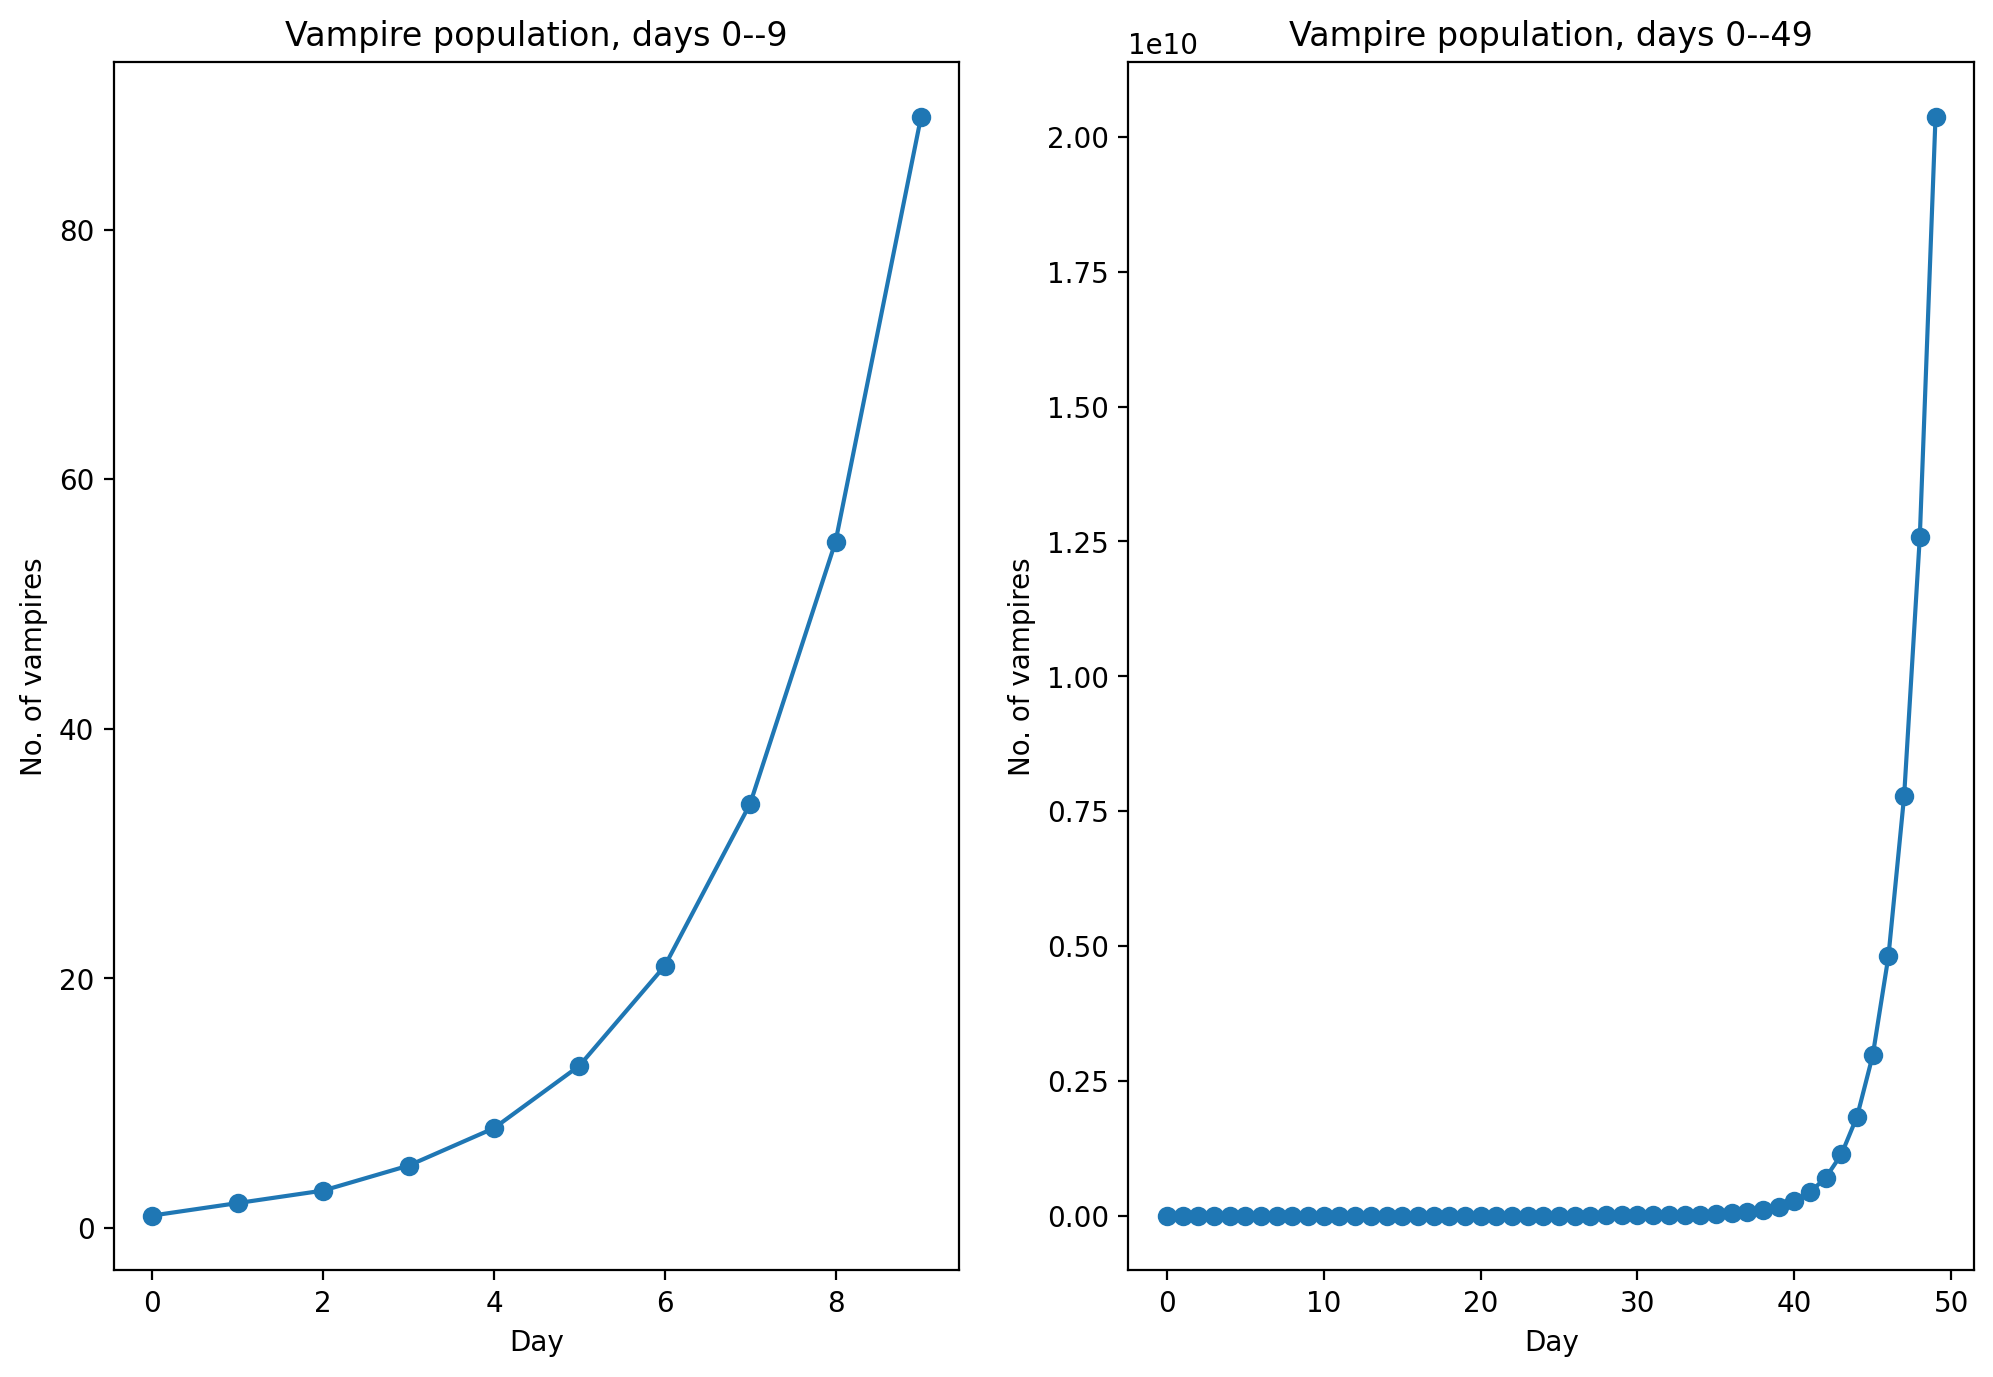

In [4]:
plt.figure(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')  # This makes the plot a bit bigger
                                                                    # than the standard size.

plt.subplot(1,2,1)
plt.plot(vampires(10),'o-')
plt.title("Vampire population, days 0--9")
plt.xlabel("Day")
plt.ylabel("No. of vampires")

plt.subplot(1,2,2)
plt.plot(vampires(50),'o-')
plt.title("Vampire population, days 0--49")
plt.xlabel("Day")
plt.ylabel("No. of vampires")

plt.show()

As you can see, after night 50, the population is predicted to be more than $2\cdot 10^{10}$ which is more than the current human population. Since vampires can only be created by turning existing humans, this model is flawed.

### Creating a new model

Let's start over again from scratch and try to build a new model with an upper bound on the population size. 

#### First step, a simple growth model without bound.
To keep it simple let's start with the premise that the population on day (or year, or minute, or other suitable time interval) $n$, depends only on the population on day $n-1$, and grows by a factor $r\geq 0$, i.e.
$$p_n=rp_{n-1}.$$
This model suffers from the same flaw as our vampire model above. You can easily see that 
$$p_1=rp_0,\quad p_2=rp_1=r\cdot rp_0,\quad p_3=rp_2=r\cdot r\cdot rp_0,\ldots,$$
i.e.
$$p_n=r^np_0,\quad n=0,1,2,\ldots.$$
In other words, the population grows exponentially, which is unsustainable in the long run.

Let's try to modify this model to also account for limited resources!

#### Set a maximum population size and change variable
Suppose our population can't grow larger than some maximum size $p_{\text{max}}$ and let
$$q_n=\frac{p_n}{p_{\text{max}}}.$$
Note that since $p_n\in [0,p_{\text{max}}]$, we must have
$$q_n\in [0,1].$$

#### Introduce a damping factor in our model
Next, let's change our model from $q_n=rq_{n-1}$ to
$$q_n=r(1-q_{n-1})q_{n-1}.$$
Note that the additional factor $(1-q_{n-1})$ reduces the rate of growth towards zero as $q_n$ approaches the maximum value $1$. This factor can be seen as taking into account the fact that available resources (and hence growth) decrease as the population nears its maximum.

For this to work however, we need some restrictions on $r$ for the model to make sense. We have already observed that we need $r\geq 0$, but to guarantee that $q_n\in [0,1]$ we need the range of $f(x)=r(1-x)x$ to be contained in $[0,1]$.

# Exercise (to submit in LAMS).

What is the largest admissable value of $r$ that will still guarantee that $\mathrm{range}(f)\subset [0,1]$?


In [ ]:
def vampires(N) :
    p = np.ones(N)  # Create an array of length N with all entries equal to 1.
    p[1]=2           # Note that p[0] is already 1, but let's set p[1]=2 (according to the model)
    for n in range(2,N) :   # Then calculate p[n] for n=2,3,...,N-1
        p[n]=p[n-1]+p[n-2]
    return p        # Return the array p
plt.figure(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')  # This makes the plot a bit bigger
                                                                    # than the standard size.

plt.subplot(1,2,1)
plt.plot(vampires(10),'o-')
plt.title("Vampire population, days 0--9")
plt.xlabel("Day")
plt.ylabel("No. of vampires")

plt.show()